# healifyLLM QA model

In [ ]:
# 2.30 time
!pip install -q transformers[sentencepiece] bert_score sacrebleu fastai ohmeow-blurr #datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [ ]:
import transformers
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *
#from datasets import load_dataset

%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 2
seed = 42

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


The repository for squad contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/squad.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [ ]:
# from google.colab import drive
drive.flush_and_unmount()
# drive.mount("/content/drive" , force_remount=True)

Mounted at /content/drive


In [ ]:
# %cd /content/drive/MyDrive/Colab Notebooks/HealifyML/healifyLLM QA (w dataset)

/content/drive/MyDrive/Colab Notebooks/HealifyML


# Data

In [ ]:
import os
#print(os.environ['TRANSFORMERS_CACHE'])
print(os.getcwd())

/content


In [ ]:
import pandas as pd
df = pd.read_csv('/content/healifyLLM_question_enhanced_dataset (1).csv', encoding='utf-8', engine='python')#, on_bad_lines='skip', sep='delimiter')
df.head()

,disease,question,label
0,diabetes,what is diabetes?,diabetes definition
1,diabetes,Tell me about diabetes?,diabetes definition
2,diabetes,What kind of disease is diabetes?,diabetes definition
3,diabetes,Can you elaborate on diabetes?,diabetes definition
4,diabetes,What can you tell me about diabetes?,diabetes definition


In [ ]:
len(df), df.isnull().sum()

(6799,
 disease     0
 question    0
 label       0
 dtype: int64)

In [ ]:
labels = list(set(df.label.to_list()))
label_count = len(labels)
label_count

647

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoConfig, AutoTokenizer
model_name = "roberta-base" #distilroberta-base
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)

config.num_labels = label_count

# for model. for dataloaders.  block to datablock to dataloaders.
hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), CategoryBlock)

In [ ]:
dblock = DataBlock(blocks=blocks, get_x=ColReader('question'), get_y=ColReader('label'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
#blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), CategoryBlock)
#dblock = DataBlock(blocks=blocks, get_x=ColReader('question'), get_y=ColReader('label'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs=8)

In [ ]:
dls = dblock.dataloaders(df, bs=8) #32)
torch.save(dls, "/content/dls-healifyLLM-classifier.pkl")

In [ ]:
dls = torch.load("/content/dls-healifyLLM-classifier.pkl")

In [ ]:
dls.show_batch(dataloaders=dls, max_n=3, trunc_at=500)

,text,target
0,What should I watch for if someone is at risk of malignant neoplasm of lung or carcinoma of lung based on their symptoms?,malignant neoplasm of lung or carcinoma of lung symptoms
1,Are there any methods for diagnosing malignant neoplasms or primary malignant neoplasm that I can know about?,malignant neoplasms or primary malignant neoplasm diagnosis
2,"What should I expect when getting tested for tonic-clonic epilepsy or tonic-clonic seizures, diagnosis?",tonic-clonic epilepsy or tonic-clonic seizures diagnosis


In [ ]:
model = BaseModelWrapper(hf_model)

learner = Learner(
                dls,
                model,
                opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                loss_func=PreCalculatedCrossEntropyLoss(),  # CrossEntropyLossFlat(),
                metrics=[accuracy],
                cbs=[BaseModelCallback], #
                splitter=blurr_splitter,
            ).to_fp16()

learner.model

BaseModelWrapper(
  (hf_model): RobertaForSequenceClassification(
    (roberta): RobertaModel(
      (embeddings): RobertaEmbeddings(
        (word_embeddings): Embedding(50265, 768, padding_idx=1)
        (position_embeddings): Embedding(514, 768, padding_idx=1)
        (token_type_embeddings): Embedding(1, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): RobertaEncoder(
        (layer): ModuleList(
          (0): RobertaLayer(
            (attention): RobertaAttention(
              (self): RobertaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): RobertaSelfOutput(
                (dense): Li

#### bert_f1_score seq2seq Metrics addition

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
seq2seq_metrics = {
    "rouge": {
        "compute_kwargs": {"rouge_types": ["rouge1", "rouge2", "rougeL", "rougeLsum"], "use_stemmer": True},
        "returns": ["rouge1", "rouge2", "rougeL", "rougeLsum"],
    },
    "bertscore": {"compute_kwargs": {"lang": "en"}, "returns": ["precision", "recall", "f1"]},
}

In [ ]:
fit_cbs = [Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]

The repository for rouge contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/rouge.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


The repository for bertscore contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/bertscore.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


# Stage - 0

In [ ]:
learner.freeze()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(valley=3.630780702224001e-05, slide=0.0012022644514217973)

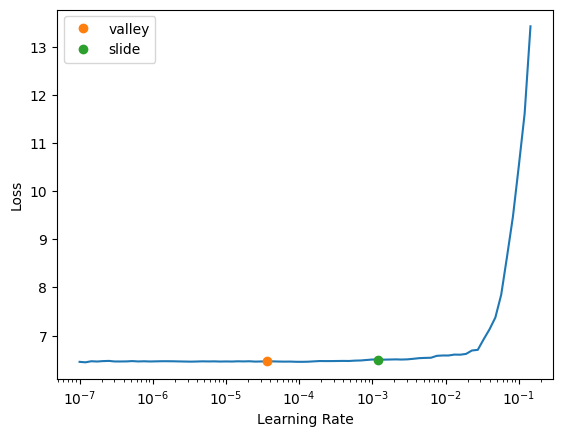

In [ ]:
learner.lr_find(suggest_funcs=[valley, slide]) #minimum, steep,

learn.lr_find(suggest_funcs=[ valley, slide]) #minimum, steep,
IndexError: tuple index out of range


In [ ]:
def lr_calculate(slide, valley):
    return (slide+ valley)/2

In [ ]:
#learn.model.to(device)
#
learner.fit_one_cycle(10, lr_max=5.5e-5)

epoch,train_loss,valid_loss,accuracy,time
0,6.483143,6.489368,0.001473,00:47
1,6.487556,6.502295,0.004418,00:47
2,6.061302,5.799939,0.111929,00:47
3,4.106537,3.734768,0.182622,00:51
4,3.022824,2.796556,0.200295,00:48
5,2.424834,2.341609,0.282769,00:48
6,2.215883,2.091238,0.400589,00:46
7,2.063419,1.955976,0.465390,00:48
8,1.947906,1.904590,0.496318,00:46
9,1.925106,1.898097,0.499264,00:49


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

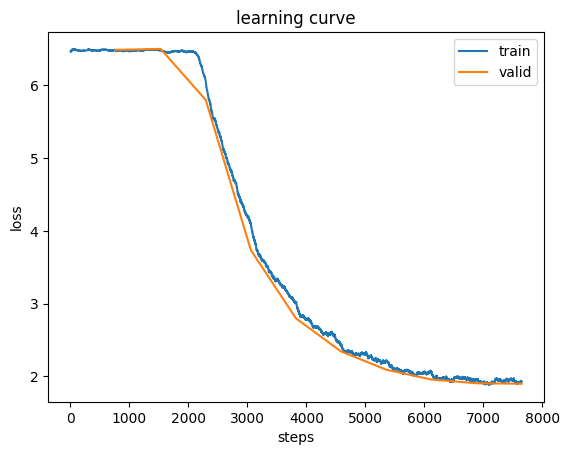

In [ ]:
learner.recorder.plot_loss()

In [ ]:
# never delete. learn.fit_one_cycle(1, lr_max=5.5e-5, cbs=fit_cbs)

In [ ]:
#learner.save("healifyLLM-stage10_v2.pkl")

In [ ]:
learner.metrics = None
learner.export("healifyLLM-stage0.pkl")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# prompt: copy /content/models/healifyLLM-stage10_v1.pth in mydrive

#!cp /content/healifyLLM-stage0.pkl /content/drive/MyDrive/healifyLLM-classifierv2.pkl


## Prediction


In [ ]:
learner2=load_learner('/content/healifyLLM-stage0.pkl')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/healifyLLM_answer_dataset.csv', encoding='utf-8', engine='python')#, on_bad_lines='skip', sep='delimiter')
df.head()

,disease,label,answer
0,diabetes,diabetes definition,"Diabetes mellitus is a metabolic disease that causes high blood sugar. Your body either doesn�t make enough insulin or can�t effectively use the insulin it makes.\nThe hormone insulin moves sugar from the blood into your cells to be stored or used for energy. If this malfunctions, you may have diabetes.\nUntreated high blood sugar from diabetes can damage your nerves, eyes, kidneys, and other organs. But educating yourself about diabetes and taking steps to prevent or manage it can help you protect your health."
1,diabetes,diabetes symptoms,"Diabetes symptoms are caused by rising blood sugar.\nGeneral symptoms\nThe symptoms of type 1, type 2, and type 1.5 (LADA) are the same, but they occur in a shorter period than types 2 and 1.5. In type 2, the onset tends to be slower. Tingling nerves and slow-healing sores are more common in type 2.\nLeft untreated, type 1, in particular, can lead to diabetic ketoacidosis. This is when there is a dangerous level of ketones in the body. It�s less common in other types of diabetes, but still possible.\nThe general symptoms of diabetes include:\nincreased hunger\nincreased thirst\nweight loss..."
2,diabetes,diabetes causes,"Different causes are associated with each type of diabetes.\nType 1 diabetes\nDoctors don�t know exactly what causes type 1 diabetes. For some reason, the immune system mistakenly attacks and destroys insulin-producing beta cells in the pancreas.\nGenes may play a role in some people. It�s also possible that a virus sets off an immune system attack.\nType 2 diabetes\nType 2 diabetes stems from a combination of genetics and lifestyle factors. Having overweight or obesity increases your risk, too. Carrying extra weight, especially in your belly, makes your cells more resistant to the effects..."
3,diabetes,diabetes risks,"Certain factors increase your risk for diabetes.\nType 1 diabetes\nYou�re more likely to get type 1 diabetes if you�re a child or teenager, you have a parent or sibling with the condition, or you carry certain genes that are linked to the disease.\nType 2 diabetes\nYour risk for type 2 diabetes increases if you:\nare overweight\nare age 45 or older\nhave a parent or sibling with the condition\naren�t physically active\nhave had gestational diabetes\nhave prediabetes\nhave high blood pressure, high cholesterol, or high triglycerides\nType 2 diabetes also disproportionately affects certain r..."
4,diabetes,diabetes complications,"High blood sugar damages organs and tissues throughout your body. The higher your blood sugar is and the longer you live with it, the greater your risk for complications.\nComplications associated with diabetes include:\nheart disease, heart attack, and stroke\nneuropathy\nnephropathy\nretinopathy and vision loss\nhearing loss\nfoot damage, such as infections and sores that don�t heal\nskin conditions, such as bacterial and fungal infections\ndepression\ndementia\nGestational diabetes\nUnmanaged gestational diabetes can lead to problems that affect both the mother and baby. Complications a..."


In [ ]:
# prompt: corresponding to label column text as "diabetes symptoms " give the answer

def get_answer_for_label(label):
  """
  Given a label, returns the corresponding answer from the dataframe.
  """
  try:
    answer = df[df['label'] == label]['answer'].values[0]
  except IndexError:
    answer = "Answer not found for label: {}".format(label)
  return answer


In [ ]:
# Text for prediction
text = "describe about the diagnosis of diabetes"

# Perform prediction
prediction = learner2.blurr_predict(text)

# Extract information from prediction
pred_info = prediction[0]  # Assuming prediction is a list with a dictionary as its first element

label = pred_info['label']
score = pred_info['score']
class_index = pred_info['class_index']
class_labels = pred_info['class_labels']

# Get the predicted class label
predicted_class_label = class_labels[class_index]

# Print the results
print(f"Predicted Label: {label}")
print(f"Prediction Score: {score}")
print(f"Predicted Class Index: {class_index}")
print(f"Predicted Class Label: {predicted_class_label}")
answer = get_answer_for_label(predicted_class_label)

# Print the answer
print(answer)


Predicted Label: d
Prediction Score: 0.22858281433582306
Predicted Class Index: 205
Predicted Class Label: diabetes diagnosis
Anyone who has symptoms of diabetes or is at risk for the condition should be tested. People are routinely tested for gestational diabetes during their second trimester or third trimester of pregnancy.
Doctors use these blood tests to diagnose prediabetes and diabetes:
The fasting plasma glucose (FPG) test measures your blood sugar after you�ve fasted for 8 hours.
The A1C test provides a snapshot of your blood sugar levels over the previous 3 months.
A 75-gram oral glucose tolerance test is also used. This checks the BG 2 hours after ingesting a sugary drink containing 75 grams of carbs.
How to diagnose gestational diabetes
To diagnose gestational diabetes, your doctor will test your blood sugar levels between the 24th week and 28th week of pregnancy. There are two types of tests:
Glucose challenge test: During a glucose challenge test, your blood sugar is check

# Stage - 1

In [ ]:
learner.freeze_to(-2)
learn.lr_find(suggest_funcs=[minimum, steep, valley, slide])


In [ ]:
learner.fit_one_cycle(3, lr_max=slice(4.37e-5, 1.74e-4), cbs=fit_cbs)

In [ ]:
learner.export("healifyLLM-stage1")

# Stage - 2

In [ ]:
learner.freeze_to(-3)
learner.lr_find(suggest_funcs=[minimum, steep, valley, slide])


In [ ]:
learner.fit_one_cycle(3, lr_max=slice(4.37e-5, 1.74e-4), cbs=fit_cbs)

In [ ]:
learner.export("healifyLLM-stage2")

# Stage - 3

In [ ]:
learner.freeze_to(-3)
learner.lr_find(suggest_funcs=[minimum, steep, valley, slide])

In [ ]:
learner.fit_one_cycle(3, lr_max=slice(4.37e-5, 1.74e-4), cbs=fit_cbs)

In [ ]:
learner.export("healifyLLM-stage3")

# final Stage - 4

In [ ]:
# learner.load("book-classifier-stage-0")

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find(suggest_funcs=[minimum, steep, valley, slide])

In [ ]:
learn.fit_one_cycle(3, lr_max=slice(4.37e-5, 1.74e-4), cbs=fit_cbs)

In [ ]:
learner.export("/content/drive/MyDrive/healifyLLM-classifierv3.pkl")

# Inference

In [ ]:
#load_learner will work only if export mehod is used

In [ ]:
learner2=load_learner('/content/drive/MyDrive/healifyLLM-classifierv3.pkl')

In [ ]:
from fastai.learner import load_learner

In [ ]:
dls = torch.load("/content/healifyLLM-classifier.pkl")

# Load the model
learner = load_learner("/content/healifyLLM-classifier.pkl")

AttributeError: dls

In [ ]:
learner1 = load_learner("/content/healifyLLM-classifier.pkl")

AttributeError: dls

In [ ]:
learner_inf = load_learner(fname="/content/dls-healifyLLM-classifier.pkl")

AttributeError: dls

In [ ]:
learner_inf.blurr_predict(test_quote)[0]['labels']

In [ ]:
learner_inf.blurr_predict(test_quote)

In [ ]:
#text2text generation
prediction = inf_learn.blurr_predict("I want to know about Alzheimer's disease")
prediction[0]

In [ ]:
# model.vocab testing and pairing
vocab = [
  "Alzheimer's disease causes", "Alzheimer's disease definition", "Alzheimer's disease diagnosis", "Alzheimer's disease prevention", "Alzheimer's disease symptoms", "Alzheimer's disease treatment", 'COPD causes', 'COPD definition', 'COPD diagnosis', 'COPD symptoms', 'COPD treatment', 'Pneumocystis pneumonia causes', 'Pneumocystis pneumonia definition', 'Pneumocystis pneumonia diagnosis', 'Pneumocystis pneumonia symptoms', 'Pneumocystis pneumonia treatment', 'acute kidney injury causes', 'acute kidney injury complications', 'acute kidney injury definition', 'acute kidney injury diagnosis', 'acute kidney injury prevention', 'acute kidney injury risks', 'acute kidney injury symptoms', 'acute kidney injury treatment', 'adhesion causes', 'adhesion complications', 'adhesion definition', 'adhesion symptoms', 'adhesion treatment', 'alcohol use disorder causes', 'alcohol use disorder definition', 'alcohol use disorder diagnosis', 'alcohol use disorder prevention', 'alcohol use disorder risks', 'alcohol use disorder symptoms', 'anxiety disorder causes', 'anxiety disorder definition', 'anxiety disorder diagnosis', 'anxiety disorder prevention', 'anxiety disorder risks', 'anxiety disorder symptoms', 'anxiety disorder treatment', 'aortic valve stenosis causes', 'aortic valve stenosis definition', 'aortic valve stenosis diagnosis', 'aortic valve stenosis risks', 'aortic valve stenosis symptoms', 'aphasia causes', 'aphasia definition', 'aphasia diagnosis', 'aphasia prevention', 'aphasia risks', 'aphasia symptoms', 'arthritis causes', 'arthritis complications', 'arthritis definition', 'arthritis diagnosis', 'arthritis risks', 'arthritis symptoms', 'asthma causes', 'asthma definition', 'asthma diagnosis', 'asthma prevention', 'asthma symptoms', 'asthma treatment', 'bacteremia causes', 'bacteremia definition', 'bacteremia diagnosis', 'bacteremia risks', 'bacteremia symptoms', 'bacteremia treatment', 'bedsore causes', 'bedsore definition', 'bedsore diagnosis', 'bedsore prevention', 'bedsore risks', 'bedsore symptoms', 'bedsore treatment', 'benign prostatic hypertrophy causes', 'benign prostatic hypertrophy complications', 'benign prostatic hypertrophy diagnosis', 'benign prostatic hypertrophy symptoms', 'benign prostatic hypertrophy treatment', 'bipolar disorder causes', 'bipolar disorder definition', 'bipolar disorder prevention', 'bipolar disorder symptoms', 'bipolar disorder treatment', 'candidiasis or oral candidiasis causes', 'candidiasis or oral candidiasis complications', 'candidiasis or oral candidiasis definition', 'candidiasis or oral candidiasis diagnosis', 'candidiasis or oral candidiasis prevention', 'candidiasis or oral candidiasis risks', 'candidiasis or oral candidiasis symptoms', 'carcinoma causes', 'carcinoma definition', 'carcinoma diagnosis', 'carcinoma prevention', 'carcinoma risks', 'carcinoma symptoms', 'carcinoma treatment', 'cardiomyopathy causes', 'cardiomyopathy definition', 'cardiomyopathy diagnosis', 'cardiomyopathy prevention', 'cardiomyopathy risks', 'cardiomyopathy symptoms', 'cellulitis causes', 'cellulitis complications', 'cellulitis definition', 'cellulitis diagnosis', 'cellulitis prevention', 'cellulitis risks', 'cellulitis symptoms', 'cholecystitis causes', 'cholecystitis definition', 'cholecystitis diagnosis', 'cholecystitis prevention', 'cholecystitis symptoms', 'cholecystitis treatment', 'cholelithiasis or biliary calculus causes', 'cholelithiasis or biliary calculus definition', 'cholelithiasis or biliary calculus diagnosis', 'cholelithiasis or biliary calculus prevention', 'cholelithiasis or biliary calculus risks', 'cholelithiasis or biliary calculus symptoms', 'cholelithiasis or biliary calculus treatment', 'chronic kidney failure causes', 'chronic kidney failure definition', 'chronic kidney failure diagnosis', 'chronic kidney failure prevention', 'chronic kidney failure symptoms', 'chronic kidney failure treatment', 'cirrhosis causes', 'cirrhosis complications', 'cirrhosis definition', 'cirrhosis diagnosis', 'cirrhosis prevention', 'cirrhosis symptoms', 'cirrhosis treatment', 'colitis causes', 'colitis complications', 'colitis definition', 'colitis diagnosis', 'colitis prevention', 'colitis risks', 'colitis symptoms', 'colitis treatment', 'congestive heart failure causes', 'congestive heart failure complications', 'congestive heart failure definition', 'congestive heart failure diagnosis', 'congestive heart failure prevention', 'congestive heart failure risks', 'congestive heart failure symptoms', 'coronary arteriosclerosis or coronary heart disease causes', 'coronary arteriosclerosis or coronary heart disease definition', 'coronary arteriosclerosis or coronary heart disease diagnosis', 'coronary arteriosclerosis or coronary heart disease risks', 'coronary arteriosclerosis or coronary heart disease symptoms', 'coronary arteriosclerosis or coronary heart disease treatment', 'coronary artery disease causes', 'coronary artery disease definition', 'coronary artery disease diagnosis', 'coronary artery disease risks', 'coronary artery disease symptoms', 'coronary artery disease treatment', 'deep vein thrombosis complications', 'deep vein thrombosis definition', 'deep vein thrombosis diagnosis', 'deep vein thrombosis prevention', 'deep vein thrombosis risks', 'deep vein thrombosis symptoms', 'deep vein thrombosis treatment', 'dehydration complications', 'dehydration definition', 'dehydration diagnosis', 'dehydration prevention', 'dehydration risks', 'delirium causes', 'delirium definition', 'delirium diagnosis', 'delirium risks', 'delirium symptoms', 'delusion causes', 'delusion complications', 'delusion definition', 'delusion diagnosis', 'delusion risks', 'delusion symptoms', 'delusion treatment', 'dementia causes', 'dementia definition', 'dementia prevention', 'dementia symptoms', 'dementia treatment', 'dependence definition', 'dependence symptoms', 'depression mental or depressive disorder causes', 'depression mental or depressive disorder definition', 'depression mental or depressive disorder symptoms', 'diabetes causes', 'diabetes complications', 'diabetes definition', 'diabetes diagnosis', 'diabetes prevention', 'diabetes risks', 'diabetes symptoms', 'diabetes treatment', 'diverticulitis causes', 'diverticulitis complications', 'diverticulitis definition', 'diverticulitis diagnosis', 'diverticulitis prevention', 'diverticulitis risks', 'diverticulitis symptoms', 'diverticulitis treatment', 'diverticulosis causes', 'diverticulosis complications', 'diverticulosis definition', 'diverticulosis diagnosis', 'diverticulosis prevention', 'diverticulosis risks', 'diverticulosis symptoms', 'diverticulosis treatment', 'dysphagia causes', 'dysphagia definition', 'dysphagia diagnosis', 'dysphagia symptoms', 'dysphagia treatment', 'embolism pulmonary causes', 'embolism pulmonary definition', 'embolism pulmonary diagnosis', 'embolism pulmonary prevention', 'embolism pulmonary risks', 'embolism pulmonary symptoms', 'emotional lability causes', 'emotional lability definition', 'emotional lability diagnosis', 'emotional lability symptoms', 'emphysema pulmonary causes', 'emphysema pulmonary complications', 'emphysema pulmonary definition', 'emphysema pulmonary diagnosis', 'emphysema pulmonary prevention', 'emphysema pulmonary symptoms', 'encephalopathy causes', 'encephalopathy definition', 'encephalopathy diagnosis', 'encephalopathy prevention', 'encephalopathy symptoms', 'endocarditis causes', 'endocarditis complications', 'endocarditis definition', 'endocarditis diagnosis', 'endocarditis prevention', 'endocarditis risks', 'endocarditis symptoms', 'epilepsy causes', 'epilepsy definition', 'epilepsy diagnosis', 'epilepsy prevention', 'epilepsy symptoms', 'fluid overload causes', 'fluid overload definition', 'fluid overload diagnosis', 'fluid overload symptoms', 'gastroesophageal reflux disease causes', 'gastroesophageal reflux disease complications', 'gastroesophageal reflux disease definition', 'gastroesophageal reflux disease diagnosis', 'gastroesophageal reflux disease symptoms', 'gastroesophageal reflux disease treatment', 'glaucoma causes', 'glaucoma definition', 'glaucoma diagnosis', 'glaucoma prevention', 'glaucoma risks', 'glaucoma symptoms', 'gout causes', 'gout definition', 'gout diagnosis', 'gout prevention', 'gout symptoms', 'gout treatment', 'heart failure causes', 'heart failure complications', 'heart failure definition', 'heart failure diagnosis', 'heart failure prevention', 'heart failure risks', 'heart failure symptoms', 'hemorrhoids causes', 'hemorrhoids definition', 'hemorrhoids diagnosis', 'hemorrhoids prevention', 'hemorrhoids risks', 'hemorrhoids symptoms', 'hepatitis C definition', 'hepatitis C prevention', 'hepatitis C risks', 'hepatitis C symptoms', 'hepatitis causes', 'hepatitis complications', 'hepatitis definition', 'hepatitis diagnosis', 'hepatitis prevention', 'hepatitis symptoms', 'hernia causes', 'hernia complications', 'hernia definition', 'hernia diagnosis', 'hernia hiatal causes', 'hernia hiatal definition', 'hernia hiatal diagnosis', 'hernia hiatal prevention', 'hernia hiatal symptoms', 'hernia hiatal treatment', 'hernia prevention', 'hernia symptoms', 'hernia treatment', 'high cholesterol causes', 'high cholesterol complications', 'high cholesterol definition', 'high cholesterol prevention', 'high cholesterol risks', 'high cholesterol symptoms', 'hyperbilirubinemia causes', 'hyperbilirubinemia definition', 'hyperbilirubinemia symptoms', 'hypoglycemia causes', 'hypoglycemia complications', 'hypoglycemia definition', 'hypoglycemia diagnosis', 'hypoglycemia prevention', 'hypoglycemia symptoms', 'hypothyroidism causes', 'hypothyroidism complications', 'hypothyroidism definition', 'hypothyroidism diagnosis', 'hypothyroidism risks', 'hypothyroidism symptoms', 'hypothyroidism treatment', 'ileus causes', 'ileus definition', 'ileus diagnosis', 'ileus prevention', 'ileus risks', 'ileus symptoms', 'incontinence definition', 'incontinence symptoms', 'incontinence treatment', 'infectious disease causes', 'infectious disease complications', 'infectious disease definition', 'infectious disease diagnosis', 'infectious disease prevention', 'infectious disease risks', 'infectious disease symptoms', 'influenza definition', 'influenza diagnosis', 'influenza prevention', 'influenza symptoms', 'influenza treatment', 'ischemia causes', 'ischemia complications', 'ischemia definition', 'ischemia diagnosis', 'ischemia risks', 'ischemia symptoms', 'ketoacidosis diabetic causes', 'ketoacidosis diabetic definition', 'ketoacidosis diabetic diagnosis', 'ketoacidosis diabetic prevention', 'ketoacidosis diabetic risks', 'ketoacidosis diabetic symptoms', 'kidney disease causes', 'kidney disease complications', 'kidney disease definition', 'kidney disease diagnosis', 'kidney disease prevention', 'kidney disease symptoms', 'kidney disease treatment', 'kidney failure causes', 'kidney failure complications', 'kidney failure definition', 'kidney failure diagnosis', 'kidney failure prevention', 'kidney failure symptoms', 'kidney failure treatment', 'lymphedema causes', 'lymphedema complications', 'lymphedema definition', 'lymphedema diagnosis', 'lymphedema symptoms', 'lymphoma causes', 'lymphoma definition', 'lymphoma diagnosis', 'lymphoma risks', 'lymphoma symptoms', 'malignant neoplasm of breast or carcinoma breast definition', 'malignant neoplasm of breast or carcinoma breast diagnosis', 'malignant neoplasm of breast or carcinoma breast prevention', 'malignant neoplasm of breast or carcinoma breast risks', 'malignant neoplasm of breast or carcinoma breast symptoms', 'malignant neoplasm of breast or carcinoma breast treatment', 'malignant neoplasm of lung or carcinoma of lung causes', 'malignant neoplasm of lung or carcinoma of lung complications', 'malignant neoplasm of lung or carcinoma of lung definition', 'malignant neoplasm of lung or carcinoma of lung diagnosis', 'malignant neoplasm of lung or carcinoma of lung prevention', 'malignant neoplasm of lung or carcinoma of lung risks', 'malignant neoplasm of lung or carcinoma of lung symptoms', 'malignant neoplasm of lung or carcinoma of lung treatment', 'malignant neoplasms or primary malignant neoplasm causes', 'malignant neoplasms or primary malignant neoplasm definition', 'malignant neoplasms or primary malignant neoplasm diagnosis', 'malignant neoplasms or primary malignant neoplasm symptoms', 'malignant tumor of colon or carcinoma colon causes', 'malignant tumor of colon or carcinoma colon definition', 'malignant tumor of colon or carcinoma colon diagnosis', 'malignant tumor of colon or carcinoma colon prevention', 'malignant tumor of colon or carcinoma colon risks', 'malignant tumor of colon or carcinoma colon symptoms', 'malignant tumor of colon or carcinoma colon treatment', 'manic disorder causes', 'manic disorder definition', 'manic disorder prevention', 'manic disorder symptoms', 'manic disorder treatment', 'melanoma causes', 'melanoma definition', 'melanoma diagnosis', 'melanoma symptoms', 'migraine disorders causes', 'migraine disorders definition', 'migraine disorders diagnosis', 'migraine disorders prevention', 'migraine disorders symptoms', 'migraine disorders treatment', 'mitral valve prolapse definition', 'mitral valve prolapse diagnosis', 'mitral valve prolapse risks', 'mitral valve prolapse symptoms', 'myocardial infarction causes', 'myocardial infarction definition', 'myocardial infarction diagnosis', 'myocardial infarction prevention', 'myocardial infarction risks', 'myocardial infarction symptoms', 'neoplasm causes', 'neoplasm definition', 'neoplasm diagnosis', 'neoplasm metastasis definition', 'neoplasm metastasis diagnosis', 'neoplasm metastasis symptoms', 'neoplasm symptoms', 'neuropathy causes', 'neuropathy definition', 'neuropathy diagnosis', 'neuropathy prevention', 'neuropathy symptoms', 'neuropathy treatment', 'neutropenia causes', 'neutropenia definition', 'neutropenia diagnosis', 'neutropenia prevention', 'neutropenia risks', 'neutropenia symptoms', 'obesity causes', 'obesity complications', 'obesity definition', 'obesity diagnosis', 'obesity morbid causes', 'obesity morbid complications', 'obesity morbid definition', 'obesity morbid diagnosis', 'obesity morbid prevention', 'obesity morbid risks', 'obesity prevention', 'obesity risks', 'obesity symptoms', 'osteoarthritis causes', 'osteoarthritis complications', 'osteoarthritis definition', 'osteoarthritis diagnosis', 'osteoarthritis risks', 'osteoarthritis symptoms', 'osteomyelitis causes', 'osteomyelitis definition', 'osteomyelitis diagnosis', 'osteomyelitis prevention', 'osteomyelitis risks', 'osteomyelitis symptoms', 'osteomyelitis treatment', 'osteoporosis causes', 'osteoporosis complications', 'osteoporosis definition', 'osteoporosis symptoms', 'osteoporosis treatment', 'pancreatitis causes', 'pancreatitis complications', 'pancreatitis definition', 'pancreatitis diagnosis', 'pancreatitis risks', 'pancreatitis symptoms', 'pancytopenia causes', 'pancytopenia definition', 'pancytopenia diagnosis', 'pancytopenia prevention', 'pancytopenia symptoms', 'pancytopenia treatment', 'paranoid personality disorder causes', 'paranoid personality disorder definition', 'paranoid personality disorder diagnosis', 'paranoid personality disorder symptoms', 'paroxysmal nocturnal dyspnea causes', 'paroxysmal nocturnal dyspnea definition', 'paroxysmal nocturnal dyspnea diagnosis', 'paroxysmal nocturnal dyspnea symptoms', 'partial paralysis causes', 'partial paralysis definition', 'partial paralysis symptoms', 'partial paralysis treatment', 'peptic ulcer definition', 'peptic ulcer symptoms', 'personality disorder causes', 'personality disorder definition', 'personality disorder diagnosis', 'personality disorder treatment', 'pneumonia aspiration causes', 'pneumonia aspiration definition', 'pneumonia aspiration diagnosis', 'pneumonia aspiration prevention', 'pneumonia aspiration risks', 'pneumonia aspiration symptoms', 'pneumonia causes', 'pneumonia complications', 'pneumonia definition', 'pneumonia diagnosis', 'pneumonia prevention', 'pneumonia symptoms', 'pneumonia treatment', 'pneumothorax causes', 'pneumothorax complications', 'pneumothorax definition', 'pneumothorax diagnosis', 'pneumothorax risks', 'pneumothorax symptoms', 'pneumothorax treatment', 'psychotic disorder causes', 'psychotic disorder complications', 'psychotic disorder definition', 'psychotic disorder diagnosis', 'psychotic disorder risks', 'psychotic disorder symptoms', 'psychotic disorder treatment', 'pulmonary edema causes', 'pulmonary edema definition', 'pulmonary edema diagnosis', 'pulmonary edema prevention', 'pulmonary edema risks', 'pulmonary edema symptoms', 'pulmonary edema treatment', 'pulmonary hypertension causes', 'pulmonary hypertension complications', 'pulmonary hypertension definition', 'pulmonary hypertension diagnosis', 'pulmonary hypertension symptoms', 'pulmonary hypertension treatment', 'pyelonephritis causes', 'pyelonephritis complications', 'pyelonephritis definition', 'pyelonephritis diagnosis', 'pyelonephritis prevention', 'pyelonephritis risks', 'pyelonephritis symptoms', 'rash definition', 'rash treatment', 'respiratory failure causes', 'respiratory failure complications', 'respiratory failure definition', 'respiratory failure diagnosis', 'respiratory failure risks', 'respiratory failure symptoms', 'sepsis causes', 'sepsis complications', 'sepsis definition', 'sepsis diagnosis', 'sepsis prevention', 'sepsis risks', 'sepsis symptoms', 'sickle cell anemia complications', 'sickle cell anemia definition', 'sickle cell anemia diagnosis', 'sickle cell anemia risks', 'sickle cell anemia symptoms', 'stroke causes', 'stroke complications', 'stroke definition', 'stroke diagnosis', 'stroke prevention', 'stroke risks', 'stroke symptoms', 'stroke treatment', 'suicide attempt definition', 'suicide attempt diagnosis', 'suicide attempt prevention', 'suicide attempt risks', 'suicide attempt symptoms', 'tachycardia sinus causes', 'tachycardia sinus definition', 'tachycardia sinus diagnosis', 'tachycardia sinus prevention', 'tachycardia sinus symptoms', 'tachycardia sinus treatment', 'thrombocytopaenia causes', 'thrombocytopaenia complications', 'thrombocytopaenia definition', 'thrombocytopaenia diagnosis', 'thrombocytopaenia symptoms', 'thrombocytopaenia treatment', 'thrombus causes', 'thrombus complications', 'thrombus definition', 'thrombus diagnosis', 'thrombus prevention', 'thrombus symptoms', 'thrombus treatment', 'tonic-clonic epilepsy or tonic-clonic seizures causes', 'tonic-clonic epilepsy or tonic-clonic seizures definition', 'tonic-clonic epilepsy or tonic-clonic seizures diagnosis', 'tricuspid valve insufficiency causes', 'tricuspid valve insufficiency complications', 'tricuspid valve insufficiency definition', 'tricuspid valve insufficiency diagnosis', 'tricuspid valve insufficiency prevention', 'tricuspid valve insufficiency symptoms', 'tricuspid valve insufficiency treatment', 'upper respiratory infection causes', 'upper respiratory infection complications', 'upper respiratory infection definition', 'upper respiratory infection diagnosis', 'upper respiratory infection prevention', 'upper respiratory infection risks', 'upper respiratory infection symptoms']

import json
question_labels = { value: idx for idx, value in enumerate(vocab)}
with open("question_labels.json", "w") as fp:
  json.dump(question_labels, fp)

with open('question_labels.json', 'r') as f:
  labels = json.load(f)

list(labels.keys())

["Alzheimer's disease causes",
 "Alzheimer's disease definition",
 "Alzheimer's disease diagnosis",
 "Alzheimer's disease prevention",
 "Alzheimer's disease symptoms",
 "Alzheimer's disease treatment",
 'COPD causes',
 'COPD definition',
 'COPD diagnosis',
 'COPD symptoms',
 'COPD treatment',
 'Pneumocystis pneumonia causes',
 'Pneumocystis pneumonia definition',
 'Pneumocystis pneumonia diagnosis',
 'Pneumocystis pneumonia symptoms',
 'Pneumocystis pneumonia treatment',
 'acute kidney injury causes',
 'acute kidney injury complications',
 'acute kidney injury definition',
 'acute kidney injury diagnosis',
 'acute kidney injury prevention',
 'acute kidney injury risks',
 'acute kidney injury symptoms',
 'acute kidney injury treatment',
 'adhesion causes',
 'adhesion complications',
 'adhesion definition',
 'adhesion symptoms',
 'adhesion treatment',
 'alcohol use disorder causes',
 'alcohol use disorder definition',
 'alcohol use disorder diagnosis',
 'alcohol use disorder prevention',

In [ ]:
#text2text generation
prediction = learner2.blurr_predict("I want to know about COPD disease cause")
prediction

[{'label': 'C',
  'score': 0.23273871839046478,
  'class_index': 6,
  'class_labels': ["Alzheimer's disease causes", "Alzheimer's disease definition", "Alzheimer's disease diagnosis", "Alzheimer's disease prevention", "Alzheimer's disease symptoms", "Alzheimer's disease treatment", 'COPD causes', 'COPD definition', 'COPD diagnosis', 'COPD symptoms', 'COPD treatment', 'Pneumocystis pneumonia causes', 'Pneumocystis pneumonia definition', 'Pneumocystis pneumonia diagnosis', 'Pneumocystis pneumonia symptoms', 'Pneumocystis pneumonia treatment', 'acute kidney injury causes', 'acute kidney injury complications', 'acute kidney injury definition', 'acute kidney injury diagnosis', 'acute kidney injury prevention', 'acute kidney injury risks', 'acute kidney injury symptoms', 'acute kidney injury treatment', 'adhesion causes', 'adhesion complications', 'adhesion definition', 'adhesion symptoms', 'adhesion treatment', 'alcohol use disorder causes', 'alcohol use disorder definition', 'alcohol use d

In [ ]:
# Text for prediction
text = "describe about the diagnosis of diabetes"

# Perform prediction
prediction = learner2.blurr_predict(text)

# Extract information from prediction
pred_info = prediction[0]  # Assuming prediction is a list with a dictionary as its first element

label = pred_info['label']
score = pred_info['score']
class_index = pred_info['class_index']
class_labels = pred_info['class_labels']

# Get the predicted class label
predicted_class_label = class_labels[class_index]

# Print the results
print(f"Predicted Label: {label}")
print(f"Prediction Score: {score}")
print(f"Predicted Class Index: {class_index}")
print(f"Predicted Class Label: {predicted_class_label}")
answer = get_answer_for_label(predicted_class_label)

# Print the answer
print(answer)


Predicted Label: d
Prediction Score: 0.2289898544549942
Predicted Class Index: 205
Predicted Class Label: diabetes diagnosis
Anyone who has symptoms of diabetes or is at risk for the condition should be tested. People are routinely tested for gestational diabetes during their second trimester or third trimester of pregnancy.
Doctors use these blood tests to diagnose prediabetes and diabetes:
The fasting plasma glucose (FPG) test measures your blood sugar after you�ve fasted for 8 hours.
The A1C test provides a snapshot of your blood sugar levels over the previous 3 months.
A 75-gram oral glucose tolerance test is also used. This checks the BG 2 hours after ingesting a sugary drink containing 75 grams of carbs.
How to diagnose gestational diabetes
To diagnose gestational diabetes, your doctor will test your blood sugar levels between the 24th week and 28th week of pregnancy. There are two types of tests:
Glucose challenge test: During a glucose challenge test, your blood sugar is checke

In [ ]:
import pandas as pd
df = pd.read_csv('/content/healifyLLM_answer_dataset.csv', encoding='utf-8', engine='python')#, on_bad_lines='skip', sep='delimiter')
df.head()

,disease,label,answer
0,diabetes,diabetes definition,"Diabetes mellitus is a metabolic disease that causes high blood sugar. Your body either doesn�t make enough insulin or can�t effectively use the insulin it makes.\nThe hormone insulin moves sugar from the blood into your cells to be stored or used for energy. If this malfunctions, you may have diabetes.\nUntreated high blood sugar from diabetes can damage your nerves, eyes, kidneys, and other organs. But educating yourself about diabetes and taking steps to prevent or manage it can help you protect your health."
1,diabetes,diabetes symptoms,"Diabetes symptoms are caused by rising blood sugar.\nGeneral symptoms\nThe symptoms of type 1, type 2, and type 1.5 (LADA) are the same, but they occur in a shorter period than types 2 and 1.5. In type 2, the onset tends to be slower. Tingling nerves and slow-healing sores are more common in type 2.\nLeft untreated, type 1, in particular, can lead to diabetic ketoacidosis. This is when there is a dangerous level of ketones in the body. It�s less common in other types of diabetes, but still possible.\nThe general symptoms of diabetes include:\nincreased hunger\nincreased thirst\nweight loss..."
2,diabetes,diabetes causes,"Different causes are associated with each type of diabetes.\nType 1 diabetes\nDoctors don�t know exactly what causes type 1 diabetes. For some reason, the immune system mistakenly attacks and destroys insulin-producing beta cells in the pancreas.\nGenes may play a role in some people. It�s also possible that a virus sets off an immune system attack.\nType 2 diabetes\nType 2 diabetes stems from a combination of genetics and lifestyle factors. Having overweight or obesity increases your risk, too. Carrying extra weight, especially in your belly, makes your cells more resistant to the effects..."
3,diabetes,diabetes risks,"Certain factors increase your risk for diabetes.\nType 1 diabetes\nYou�re more likely to get type 1 diabetes if you�re a child or teenager, you have a parent or sibling with the condition, or you carry certain genes that are linked to the disease.\nType 2 diabetes\nYour risk for type 2 diabetes increases if you:\nare overweight\nare age 45 or older\nhave a parent or sibling with the condition\naren�t physically active\nhave had gestational diabetes\nhave prediabetes\nhave high blood pressure, high cholesterol, or high triglycerides\nType 2 diabetes also disproportionately affects certain r..."
4,diabetes,diabetes complications,"High blood sugar damages organs and tissues throughout your body. The higher your blood sugar is and the longer you live with it, the greater your risk for complications.\nComplications associated with diabetes include:\nheart disease, heart attack, and stroke\nneuropathy\nnephropathy\nretinopathy and vision loss\nhearing loss\nfoot damage, such as infections and sores that don�t heal\nskin conditions, such as bacterial and fungal infections\ndepression\ndementia\nGestational diabetes\nUnmanaged gestational diabetes can lead to problems that affect both the mother and baby. Complications a..."


In [ ]:
# prompt: corresponding to label column text as "diabetes symptoms " give the answer

def get_answer_for_label(label):
  """
  Given a label, returns the corresponding answer from the dataframe.
  """
  try:
    answer = df[df['label'] == label]['answer'].values[0]
  except IndexError:
    answer = "Answer not found for label: {}".format(label)
  return answer


### Resources: Utilizing, Training, Finetuning LLMs with OpenAI
Check out the OpenAI API and their documentations here: https://openai.com/api/